<a href="https://colab.research.google.com/github/yethegod/DL_implementation/blob/main/Basic_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torchvision import datasets, transforms

In [3]:
train_data = datasets.MNIST(root='data', train=True, download=True, transform=transforms.ToTensor())
test_data = datasets.MNIST(root='data', train=False, download=True, transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=1000, shuffle=True)

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 34.9MB/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.14MB/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 10.5MB/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 6.94MB/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [9]:
import torch.nn as nn
import torch.nn.functional as F

In [10]:
class CNNModel(nn.Module):
  def __init__(self):
   super(CNNModel, self).__init__()
   self.conv1 = nn.Conv2d(1, 32, kernel_size=3)
   self.conv2 = nn.Conv2d(32, 64, kernel_size=3)
   self.pool = nn.MaxPool2d(2, 2)
   self.fc1 = nn.Linear(64*5*5, 128)
   self.fc2 = nn.Linear(128, 10)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(x.size(0), -1)
    x = F.relu(self.fc1(x))
    x = self.fc2(x)
    return x

In [13]:
import torch.optim as optim
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cpu


In [14]:
criterion = nn.CrossEntropyLoss()
model = CNNModel()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 5
for epoch in range(num_epochs):
  model.train()
  running_loss = 0.0
  for batch_idx, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    output = model(data)
    loss = criterion(output, target)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
  print(f"Epoch {epoch+1}/{num_epochs}, avgLoss: {running_loss/len(train_loader)}")

Epoch 1/5, avgLoss: 0.17897348271271807
Epoch 2/5, avgLoss: 0.054128585882467044
Epoch 3/5, avgLoss: 0.03762989948626046
Epoch 4/5, avgLoss: 0.02745766621687748
Epoch 5/5, avgLoss: 0.021327640308765446


In [15]:
import matplotlib.pyplot as plt

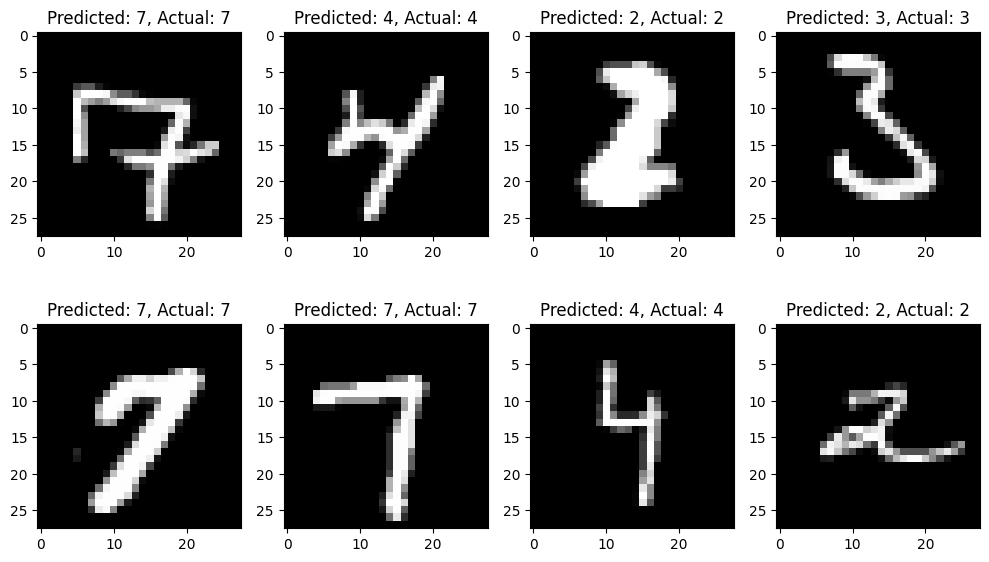

In [16]:
model.eval()
with torch.no_grad():
  data_iter = iter(test_loader)
  images, labels = next(data_iter)
  outputs = model(images)
  _, predicted = torch.max(outputs, 1)
  num_show = 8
  fig, axs = plt.subplots(2, 4, figsize=(10, 6))

  for i in range(num_show):
    ax = axs[i // 4, i % 4]
    ax.imshow(images[i].squeeze(), cmap='gray')
    ax.set_title(f"Predicted: {predicted[i].item()}, Actual: {labels[i].item()}")

  plt.tight_layout()
  plt.show()